In [1]:
%%html
<style>
h1   {text-align: center; font-family:'XB Niloofar'}
h3   {direction: rtl; font-family:'XB Niloofar';font-weight: bold}
p {direction: rtl;font-size:18px;font-family:'XB Niloofar'}
.header {
  padding: 40px;
  #text-align: center;
  background: #1abc9c;
  color: white;
  font-size: 20px;
  direction: rtl;
  font-family:'XB Niloofar'
}
</style>

<style>
h1   {text-align: center; font-family:'XB Niloofar'}
h3   {direction: rtl; font-family:'XB Niloofar';font-weight: bold}
p {direction: rtl;font-size:18px;font-family:'XB Niloofar'}
.header {
  padding: 40px;
  #text-align: center;
  background: #1abc9c;
  color: white;
  font-size: 20px;
  direction: rtl;
  font-family:'XB Niloofar'
}
</style>
<div class="header">
  <h1>نرم‌افزار ریاضی پیشرفته</h1>
  <h3>محمدرضا شمس اشکذری</h3>
<h3>9913104</h3>
</div> 
<br>

<p>
ابتدا کتابخانه های مفید برای دست‌ورزی با داده‌ها را فراخوانی می‌کنیم.
</p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(15,8.27)})

In [4]:
#Read data
df = pd.read_csv('data.csv')
test_df = pd.read_csv('to_submit.csv')

In [5]:
#Save the the names of columns
colnames = df.columns

In [6]:
#Take a look at data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


انبوه ستون‌های داده بالا، واقعاً باعث سردرگمی است و به نظر می‌رسد با یک نگاه سطحی به سختی می‌توان به نتیجه خاصی رسید. لذا باید سعی کنیم که تا حد ممکن اطلاعات اضافه و نامفید را دور بریزیم. ابتدا ویژگی‌هایی را که تقریباً ثابت هستند و تغییر نمی‌کنند، دور می‌ریزیم. برای این کار ویژگی‌هایی که کمتر از پنج مقدار به خود می‌گیرند، نگاه می‌کنیم:

In [7]:
for col in colnames:
    vea = df[col].unique()
    if(len(vea)<5):
        print(col, end=" ") 
        print(": ")
        print(vea)
        print(df.groupby(col)['Id'].nunique())
        print('***********************************')

Street : 
['Pave' 'Grvl']
Street
Grvl       6
Pave    1454
Name: Id, dtype: int64
***********************************
Alley : 
[nan 'Grvl' 'Pave']
Alley
Grvl    50
Pave    41
Name: Id, dtype: int64
***********************************
LotShape : 
['Reg' 'IR1' 'IR2' 'IR3']
LotShape
IR1    484
IR2     41
IR3     10
Reg    925
Name: Id, dtype: int64
***********************************
LandContour : 
['Lvl' 'Bnk' 'Low' 'HLS']
LandContour
Bnk      63
HLS      50
Low      36
Lvl    1311
Name: Id, dtype: int64
***********************************
Utilities : 
['AllPub' 'NoSeWa']
Utilities
AllPub    1459
NoSeWa       1
Name: Id, dtype: int64
***********************************
LandSlope : 
['Gtl' 'Mod' 'Sev']
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: Id, dtype: int64
***********************************
ExterQual : 
['Gd' 'TA' 'Ex' 'Fa']
ExterQual
Ex     52
Fa     14
Gd    488
TA    906
Name: Id, dtype: int64
***********************************
CentralAir : 
['Y' 'N']
CentralAir
N      

همزمان برای داده‌های تست هم این ویژگی‌ها را حذف می‌کنیم. 

In [8]:
#Remove fake features
df.drop(['Id','Street','Utilities','PoolQC',
               'Alley','LandContour','LandSlope',
               'CentralAir','BsmtHalfBath','KitchenAbvGr',
               'PoolQC','Condition2','RoofMatl','MasVnrType',
               'ExterCond','BsmtQual','BsmtCond','BsmtExposure',
               'BsmtFinType1','BsmtFinSF1','BsmtFinType2',
               'BsmtFinSF2','BsmtUnfSF','Heating','GarageQual',
              'GarageCond'],inplace=True , axis=1)
test_df.drop(['Id','Street','Utilities','PoolQC',
               'Alley','LandContour','LandSlope',
               'CentralAir','BsmtHalfBath','KitchenAbvGr',
               'PoolQC','Condition2','RoofMatl','MasVnrType',
               'ExterCond','BsmtQual','BsmtCond','BsmtExposure',
               'BsmtFinType1','BsmtFinSF1','BsmtFinType2',
               'BsmtFinSF2','BsmtUnfSF','Heating','GarageQual',
              'GarageCond'],inplace=True , axis=1)

In [9]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,...,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,...,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,...,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,...,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,...,0,0,NaN,NaN,0,12,2008,WD,Normal,250000


بعضی از ویژگی‌ها را هم می‌توانیم درهم ادغام کنیم.

In [10]:
df['porch'] = df['OpenPorchSF']+df['EnclosedPorch']+df['3SsnPorch']+df['ScreenPorch']
df.drop(['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],inplace=True,axis=1)
test_df['porch'] = test_df['OpenPorchSF']+test_df['EnclosedPorch']+test_df['3SsnPorch']+test_df['ScreenPorch']
test_df.drop(['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],inplace=True,axis=1)

In [11]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,porch
0,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,...,0,NaN,NaN,0,2,2008,WD,Normal,208500,61
1,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,...,0,NaN,NaN,0,5,2007,WD,Normal,181500,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,...,0,NaN,NaN,0,9,2008,WD,Normal,223500,42
3,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,...,0,NaN,NaN,0,2,2006,WD,Abnorml,140000,307
4,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,...,0,NaN,NaN,0,12,2008,WD,Normal,250000,84


گام بعدی این است که انواع مختلف ویژگی‌ها را مشخص کنیم و واریانس متغیرهای عددی را از نظر بگذرانیم. شاید در این مرحله نیز بتوانیم باز چند ویژگی دیگر را کنار بگذاریم.

In [12]:
#Divide features into 2 groups: numerical and non-numerical
#Normalization
from pandas.api.types import is_numeric_dtype
colnames = df.columns
u = 1
num_features = []
non_nums = []
for col in colnames:
    if(is_numeric_dtype(df[col])):
        print(u, end=" ")
        u = u+1
        print(col, end=" ")
        print(np.var(df[col]))
        num_features.append(col)
    else:
        non_nums.append(col)

1 MSSubClass 1788.1127322199216
2 LotFrontage 589.2581203146686
3 LotArea 99557412.90400586
4 OverallQual 1.9113693938825265
5 OverallCond 1.2374741977857118
6 YearBuilt 911.5906075248645
7 YearRemodAdd 425.9408819665972
8 MasVnrArea 32762.391986640072
9 TotalBsmtSF 192330.5381736721
10 1stFlrSF 149347.71613576615
11 2ndFlrSF 190426.5567925522
12 LowQualFinSF 2362.5847302494744
13 GrLivArea 275940.50347673136
14 BsmtFullBath 0.2690837868267893
15 FullBath 0.3033003377744419
16 HalfBath 0.2527204916494712
17 BedroomAbvGr 0.6650379996246835
18 TotRmsAbvGrd 2.640093826233859
19 Fireplaces 0.4153100957027649
20 GarageYrBlt 609.1404623690788
21 GarageCars 0.5580972039782356
22 GarageArea 45681.20029039234
23 WoodDeckSF 15699.053223400135
24 PoolArea 1613.1103659223315
25 MiscVal 245969.46768810868
26 MoSold 7.30458810283359
27 YrSold 1.7626285419403118
28 SalePrice 6306788585.349301
29 porch 11057.433882529687


حاصل پایش ستون‌ها چنین بود: کلاً 53 ستون داریم که با کنار گذاشتن ستون قیمت 28 ستون عددی هستند و 24تا غیرعددی.

**با داده‌های گمشده چه کنیم؟**

ابتدا سعی می‌کنیم با رسم یک نمودار مناسب آنها را بیابیم و بعد با توجه نوع ویژگی، کار مناسب را انجام می‌دهیم. اگر ستونی داشتیم که مقادیر گمشده زیادی داشت، کلاً ستون را حذف می‌کنیم. اگر معدود مقدار گمشده در ستونی عددی داشتیم، میانگی بقیه ستون را جایگزین می‌کنیم و برای ستون‌های غیرعددی هم یا با مد جایگزین می‌کنیم و یا با سلول همسایه.

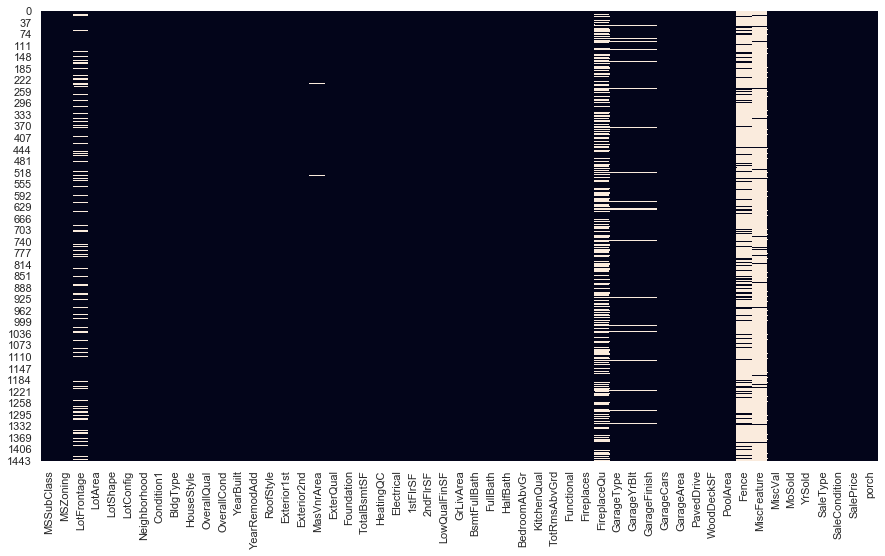

In [13]:
sns.heatmap(df.isnull(), cbar=False)

In [14]:
# Drop approx null columns

df.drop(['FireplaceQu','Fence','MiscFeature','LotFrontage'],inplace=True,axis=1)
test_df.drop(['FireplaceQu','Fence','MiscFeature','LotFrontage'],inplace=True,axis=1)

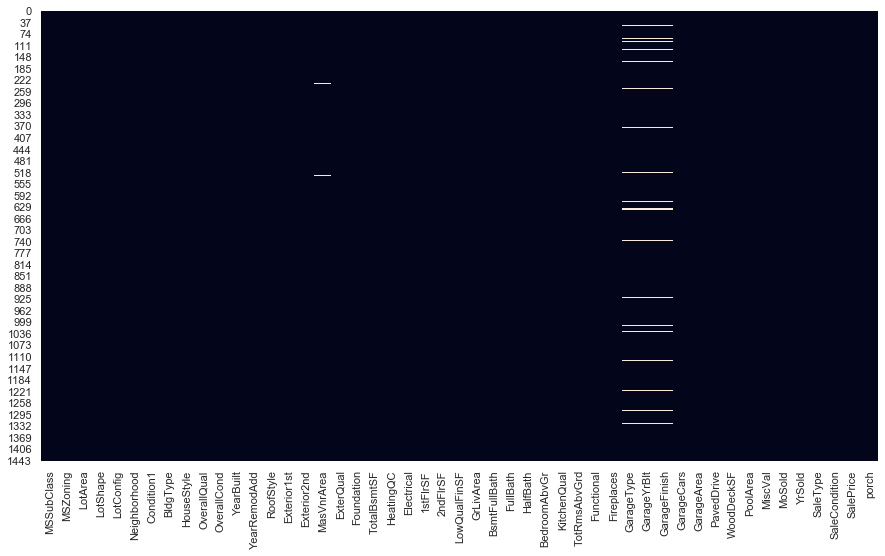

In [15]:
sns.heatmap(df.isnull(), cbar=False)

In [16]:
#Fill some of the cells with mean value
df['GarageYrBlt'] = np.where(df['GarageYrBlt'].isnull(),round(np.mean(df['GarageYrBlt'])),df['GarageYrBlt'])
df['MasVnrArea'] = np.where(df['MasVnrArea'].isnull(),round(np.mean(df['MasVnrArea'])),df['MasVnrArea'])

test_df['GarageYrBlt'] = np.where(test_df['GarageYrBlt'].isnull(),round(np.mean(test_df['GarageYrBlt'])),test_df['GarageYrBlt'])
test_df['MasVnrArea'] = np.where(test_df['MasVnrArea'].isnull(),round(np.mean(test_df['MasVnrArea'])),test_df['MasVnrArea'])

اینکه برای گاراژ، پنج متغیر داریم کمی ناراحت‌کننده به نظر می‌رسد. ابتدا بررسی می‌کنیم که آیا اصلاً این متغیرها تفاوتی در قیمت ایجاد می‌کنند؟ این کار را با بررسی میانگین قیمت‌های هر گروه از آنها یا رسم نمودار انجام دادیم.

In [17]:
#Is GarageType important?

df.groupby('GarageType').mean()['SalePrice']

GarageType
2Types     151283.333333
Attchd     202892.656322
Basment    160570.684211
BuiltIn    254751.738636
CarPort    109962.111111
Detchd     134091.162791
Name: SalePrice, dtype: float64

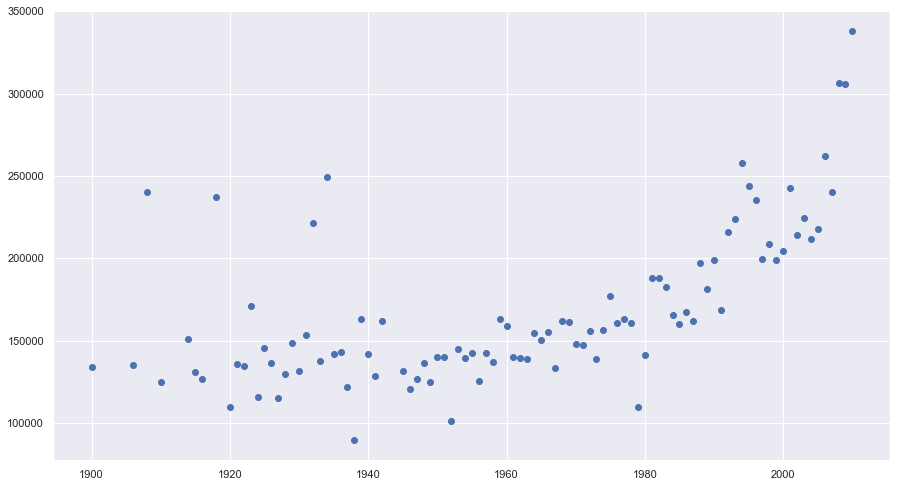

In [18]:
#Is GarageYrBlt important?

dfg = df.groupby('GarageYrBlt').mean().sort_values(['GarageYrBlt'])['SalePrice']
plt.scatter(dfg.keys(),dfg.values)
plt.show()

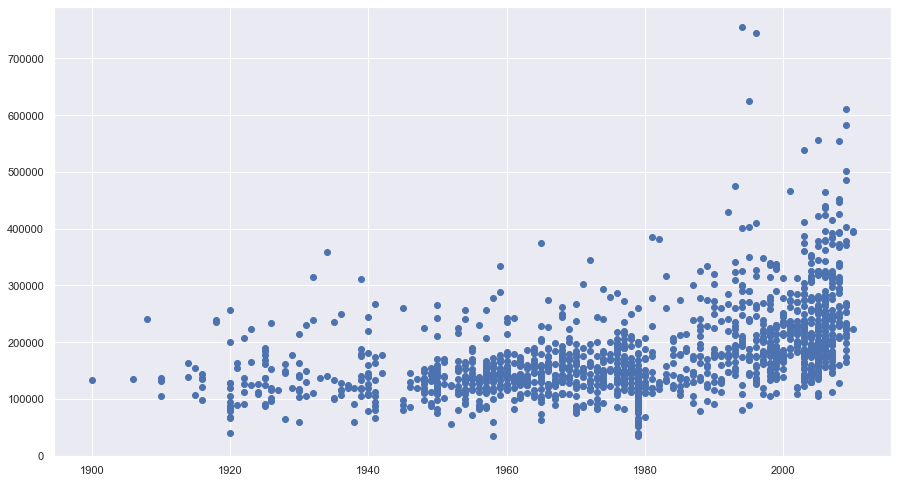

In [19]:
# fig, ax = plt.subplots()
# colors = {'Attchd':'blue', 'CarPort':'red', 'Detchd':'green', '2Types':'gray', 'BuiltIn':'orange', 'Basment':'cyan'}
plt.scatter(df['GarageYrBlt'],df['SalePrice'])
plt.show()

In [20]:
#Is GarageFinish important?

df.groupby('GarageFinish').mean()['SalePrice']

GarageFinish
Fin    240052.690341
RFn    202068.869668
Unf    142156.423140
Name: SalePrice, dtype: float64

In [21]:
#Is GarageCars important?

df.groupby('GarageCars').mean()['SalePrice']

GarageCars
0    103317.283951
1    128116.688347
2    183851.663835
3    309636.121547
4    192655.800000
Name: SalePrice, dtype: float64

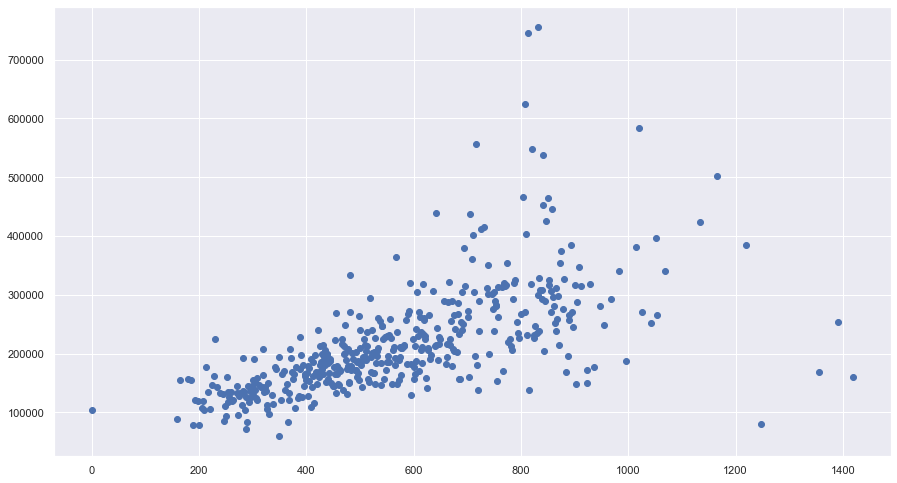

In [22]:
#Is GarageArea important?

dfc = df.groupby('GarageArea').mean()['SalePrice']
plt.scatter(dfc.keys(),dfc.values)
plt.show()

**متغیرهای دسته‌ای**

از بین متغیرهای دسته‌ای سه مورد از موثرترین‌ها را انتخاب کردم و با روش one hot encoding آن‌ها را به چند متغیر تبدیل کردم تا بتوان در مدلسازی‌ها از آنها استفاده کرد. البته این امکان هم بود که تمام داده‌ها را با این روش به صورت عددی درآوریم و در مدل استفاده کنیم که در این صورت باید با حدود 200 متغیر کار می‌کردیم.

In [23]:
# pd.get_dummies(df4)
# df4.drop([],axis=1)
bums = df.drop(['GarageType','GarageFinish','Electrical'],axis=1)
dums = pd.get_dummies(df[['GarageType','GarageFinish','Electrical']])
df = pd.concat([bums,dums],axis=1)

test_bums = test_df.drop(['GarageType','GarageFinish','Electrical'],axis=1)
test_dums = pd.get_dummies(test_df[['GarageType','GarageFinish','Electrical']])
test_df = pd.concat([test_bums,test_dums],axis=1)

df.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr
0,60,RL,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,...,0,0,0,1,0,0,0,0,0,1
1,20,RL,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,...,0,0,0,1,0,0,0,0,0,1
2,60,RL,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,...,0,0,0,1,0,0,0,0,0,1
3,70,RL,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,...,0,1,0,0,1,0,0,0,0,1
4,60,RL,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,...,0,0,0,1,0,0,0,0,0,1


حال باید از بین این ویژگی‌ها چندتا از مهم‌ترین‌ها و مرتبط‌ترین‌ها را پیدا کنیم و در مدلسازی از آنها کمک بگیریم. برای این کار، ابزارها و معیارهای مختلفی داریم: ضریب همبستگی، آنتروپی، تست کای دو و ... که در اینجا برای سادگی از همان معیار همبستگی استفاده کردیم و ویژگی‌هایی که با متغیر هدف همبستگی بیش از 0.5 داشتند، انتخاب کردیم. برای بررسی اثر این انتخاب هوشمندانه متغیرها، یک بار هم چشم بسته 10 متغیر را به تصادف انتخاب می‌کنیم و با آنها مدل می‌سازیم و نتیجه را با هم مقایسه می‌کنیم.

In [24]:
#Select features with good correlation
cordf = df.corr()
features = cordf[cordf['SalePrice']>0.5]['SalePrice'].keys().tolist()

In [25]:
from random import sample
  
#Reduced data frame
data = df[features]
features.remove('SalePrice')
test_data = test_df[features]

#Reduced Blind
colnames = df.columns.tolist()
colnames.remove('SalePrice')
random_features = sample(colnames,10)
ran_test_data = test_df[random_features]
random_features.append('SalePrice')
ran_data = df[random_features]

ابتدایی‌ترین کار با این داده‌ها این است که یک نگاه کلی به آنها بیندازیم و ارتباط بین متغیرها را بررسی کنیم. انتظار داریم که بین متغیرهای data ارتباط معنی‌دارتری ببینیم تا داده‌های ran_data.

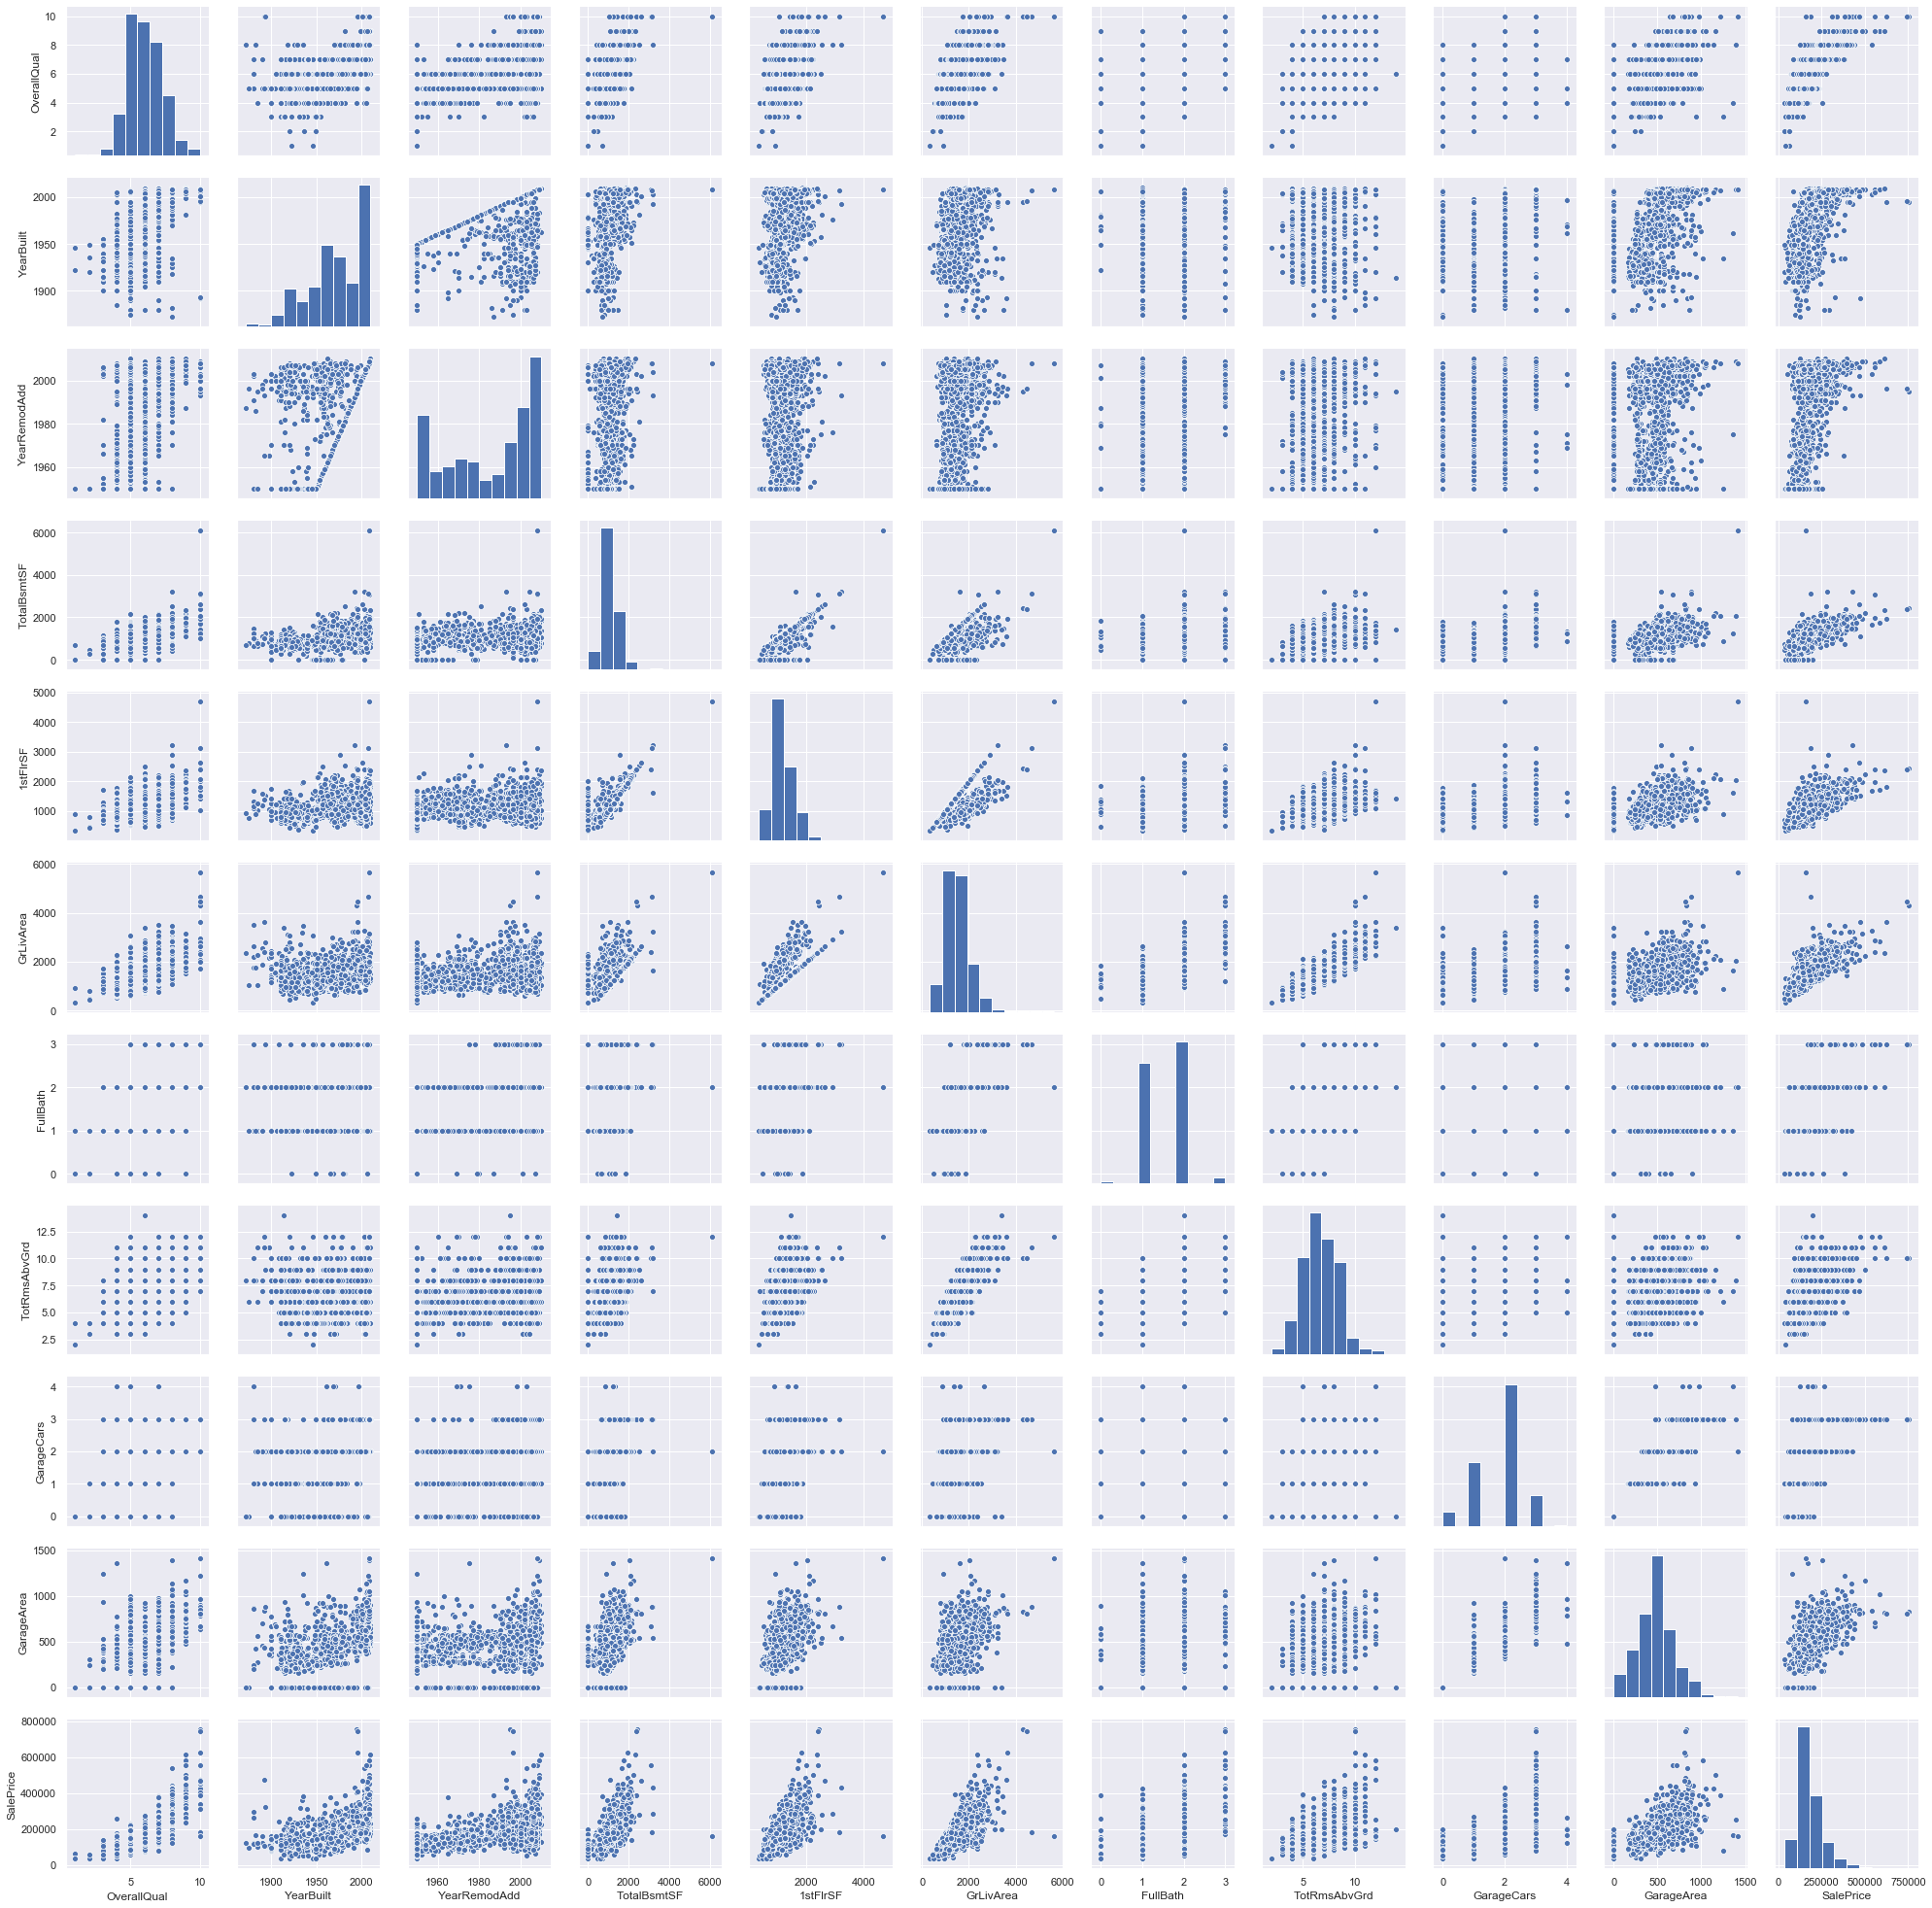

In [26]:
sns.pairplot(data)

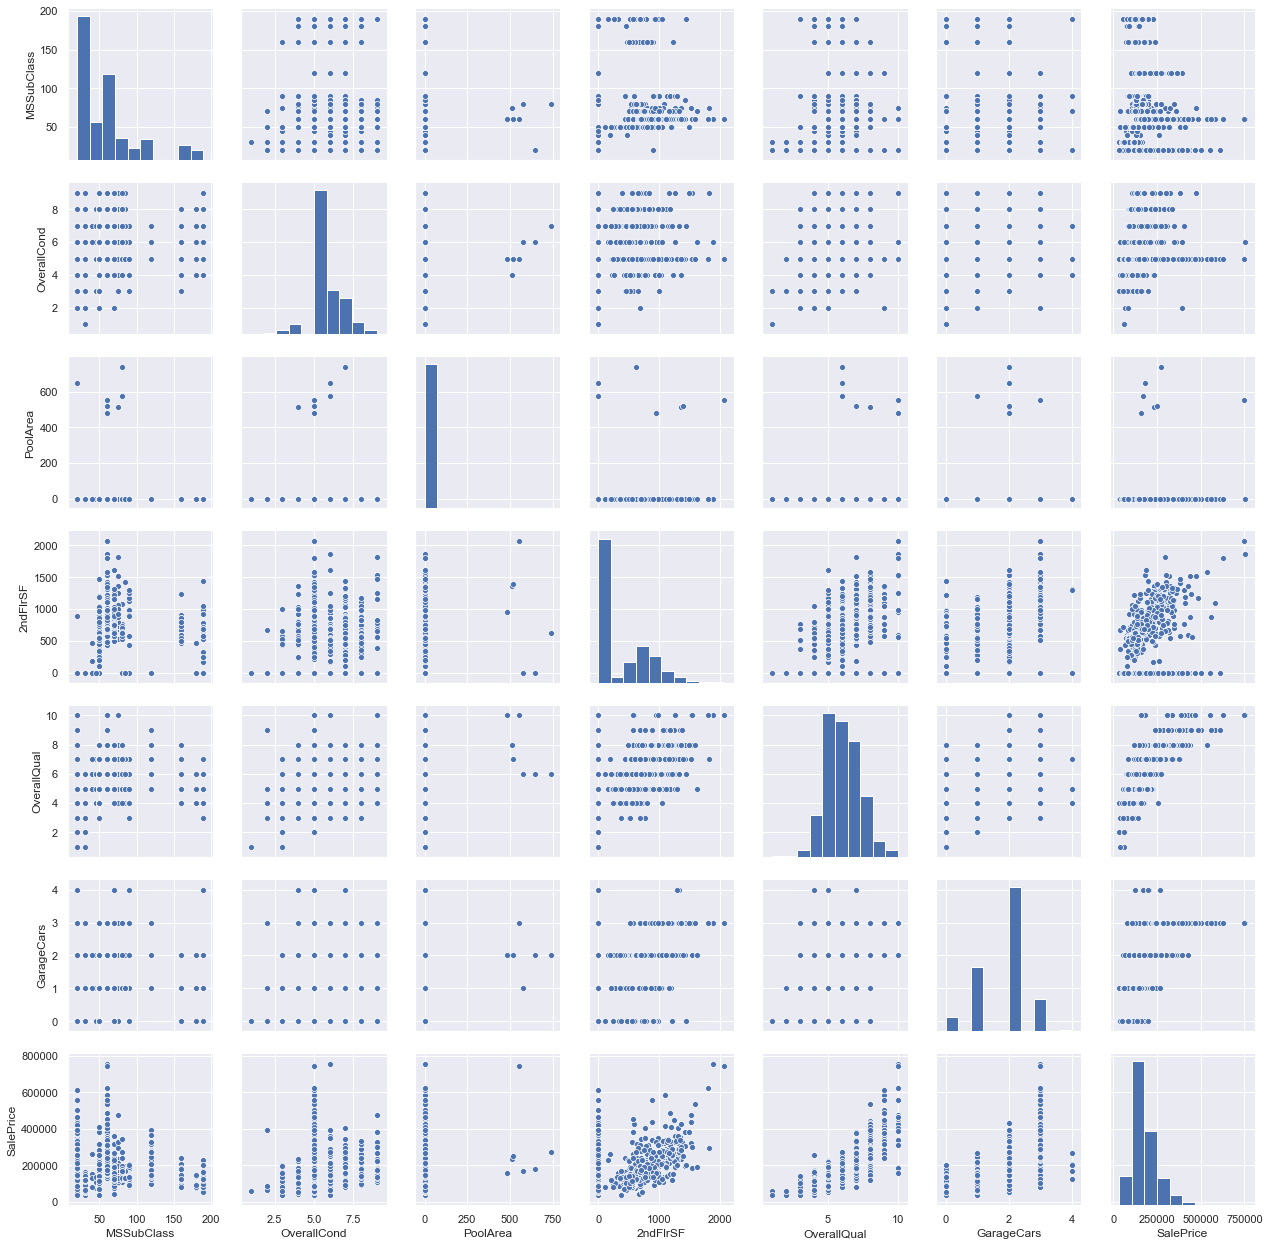

In [27]:
sns.pairplot(ran_data)

قبل از اینکه وارد مدلسازی شویم، دو کار دیگر انجام می‌دهیم: تقسیم داده‌ها به متغیرهای پیش‌بینی‌کننده و هدف و سپس نرمالسازی متغیرهای پیش‌بینی‌کننده.

In [36]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x = data.drop('SalePrice', axis = 1)
ranx = ran_data.drop('SalePrice', axis = 1)
dumx = pd.get_dummies(x)
dumranx = pd.get_dummies(ranx)
#Normalization
normal_x = (dumx-dumx.mean())/dumx.std()
normal_ranx = (dumranx-dumranx.mean())/dumranx.std()
y = data['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(normal_x, y, test_size = 0.2, random_state = 77)
ranx_train, ranx_test, rany_train, rany_test = train_test_split(normal_ranx, y, test_size = 0.2, random_state = 77)

In [34]:
dtest_data = pd.get_dummies(test_data)
dran_test_data = pd.get_dummies(ran_test_data)
#Normalize tests
normal_test_data = (dtest_data-dtest_data.mean())/dtest_data.std()
normal_ran_test_data = (dran_test_data-dran_test_data.mean())/dran_test_data.std()

**1. مدل خطی**

خوبی این مدل سادگی آن است اما در عوض انعطافی در کار نیست.

In [37]:
from sklearn import linear_model
model1 = linear_model.LinearRegression()
model1.fit(x_train,y_train)

ran_model1 = linear_model.LinearRegression()
ran_model1.fit(ranx_train,rany_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_pred1 =  model1.predict(x_test)
rany_pred1 = ran_model1.predict(ranx_test)

حال که به یک پیش‌بینی رسیدیم، لازم است مدل را ارزیابی کنیم. برای این کار از معیارهای ضریب تعیین، میانگین خطای مربعی، ریشه میانگین خطای مربعی و خطای نسبی استفاده می‌کنیم. از آنجا که لازم است پس از هر مدلسازی یک ارزیابی داشته باشیم، تابعی برای ارزیابی می‌نویسیم که خروجی مناسبی هم داشته باشد.

In [45]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
def evaluate(ytest,ypred,fd):
    score = r2_score(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mean_squared_error(ytest,ypred))
    relerr = round(rmse/(np.mean(fd['SalePrice'])),2)
    d = {'r2_score': [score], 'MSE': [mse], 'RMSE':[rmse], 'RelError':[relerr]}
    dataf = pd.DataFrame(d)  
    display(dataf)  

In [46]:
evaluate(y_test,y_pred1,data)

,r2_score,MSE,RMSE,RelError
0,0.817554,1.167549e+09,34169.418363,0.19


In [47]:
evaluate(rany_test,rany_pred1,ran_data)

,r2_score,MSE,RMSE,RelError
0,-4.640981e+25,2.969965e+35,5.449739e+17,3.012217e+12


حال برای اینکه به کمک مدل‌هایمان برای داده to_submit پیش‌بینی داشته باشیم، ابتدا داده‌های گمشده را پر می‌کنیم و سپس پیش‌بینی‌ها را در یک متغیر نگه می‌داریم تا در پایان به صورت یکجا در یک فایل اکسل ثبت کنیم.

In [51]:
normal_test_data.fillna(method='ffill',inplace=True)
normal_ran_test_data.fillna(method='ffill',inplace=True)

In [ ]:
test_pred1 = model1.predict(normal_test_data)
ran_test_pred1 = ran_model1.predict(normal_ran_test_data)

In [ ]:
# import csv

# mylist = test_pred1.tolist()
# with open('to_sub.csv', 'w') as csvoutput:
#         writer = csv.writer(csvoutput, lineterminator='\n')
#         for x in mylist:
#             writer.writerow([x])

**2. مدل بیزی ساده**

یک مدل بسیار ساده احتمالاتی است که خیلی هم از ان انتظاری نداریم ولی در مقایسه با مدل خطی جالب خواهد بود.

In [53]:
# Fitting NaiveBayes to the dataset
from sklearn.naive_bayes import GaussianNB

model2 = GaussianNB()
model2.fit(x_train, y_train)

ran_model2 = GaussianNB()
ran_model2.fit(ranx_train, rany_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [54]:
y_pred2 =  model2.predict(x_test)
rany_pred2 =  ran_model2.predict(ranx_test)

In [56]:
evaluate(y_test,y_pred2,data)

,r2_score,MSE,RMSE,RelError
0,0.663568,2.152972e+09,46400.126504,0.26


In [57]:
evaluate(rany_test,rany_pred2,ran_data)

,r2_score,MSE,RMSE,RelError
0,0.569208,2.756822e+09,52505.450342,0.29


In [ ]:
test_pred2 = model2.predict(normal_test_data)
ran_test_pred2 = ran_model2.predict(normal_ran_test_data)
# mylist2 = test_pred2.tolist()
# with open('to_sub2.csv', 'w') as csvoutput:
#         writer = csv.writer(csvoutput, lineterminator='\n')
#         for x in mylist2:
#             writer.writerow([x])

**3. مدل ماشین‌های بردار پشتیبان(SVM)**

مدل SVM از مدل‌های بسیار هوشمندانه و خوب در یادگیری ماشین است که البته استفاده از آن به سادگی بقیه نیست و باید پارامترهای آن به دقت تنظیم شوند. در اینجا صرفاً از مدل با پارامترهای پیش‌فرض استفاده کردیم.

In [60]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

model3 = SVC(gamma='auto')
model3.fit(x_train, y_train)

ran_model3 = SVC(gamma='auto')
ran_model3.fit(ranx_train, rany_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
y_pred3 =  model3.predict(x_test)
rany_pred3 =  ran_model3.predict(ranx_test)

In [62]:
evaluate(y_test,y_pred3,data)

,r2_score,MSE,RMSE,RelError
0,0.636086,2.328841e+09,48258.066317,0.27


In [63]:
evaluate(rany_test,rany_pred3,ran_data)

,r2_score,MSE,RMSE,RelError
0,0.059843,6.016475e+09,77565.938403,0.43


In [67]:
test_pred3 = model3.predict(normal_test_data)

In [68]:
import csv

mylist1 = test_pred1.tolist()
# ran_mylist1 = ran_test_pred1.tolist()
mylist2 = test_pred2.tolist()
# ran_mylist2 = ran_test_pred2.tolist()
mylist3 = test_pred3.tolist()
# ran_mylist3 = ran_test_pred3.tolist()

with open('to_sub.csv', 'w') as csvoutput:
        writer = csv.writer(csvoutput, lineterminator='\n')
        for i in range(len(mylist1)):
            writer.writerow([mylist1[i],mylist2[i],mylist3[i]])

<div class="header">
  و سپاس خدای را
</div>